In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Life is short. Use Python.

1. Sklearn https://github.com/apachecn/hands_on_Ml_with_Sklearn_and_TF/tree/dev/docs
2. Sklearn dataset: http://scikit-learn.org/stable/auto_examples/index.html#examples-based-on-real-world-datasets
3. Sklearn homepage: http://scikit-learn.org/stable/
4. Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
5. Tensorflowplayground http://playground.tensorflow.org/
6. Pypi https://pypi.org/
7. Github https://github.com/
9. Stackoverflow: https://stackoverflow.com/
10. Codecademy: https://www.codecademy.com/learn/learn-python
11. Titanic: https://www.kaggle.com/c/titanic

# Q&A
### 1. 文件路径问题：
####     windows 下的目录分隔符为 \\\，例如 C:\\\document\\\data
####     目录中有中文可能导致报错，建议使用英文命名文件夹

# 加载数据

In [2]:
import matplotlib
import sklearn
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
train = pd.read_csv('./data/train.csv', index_col = 'PassengerId') #返回一个pd.DataFrame
test = pd.read_csv('./data/test.csv', index_col = 'PassengerId')
submit = pd.read_csv('./data/gender_submission.csv', index_col = 'PassengerId')

In [4]:
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [5]:
train.shape

(891, 11)

In [6]:
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


# 预览

In [7]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
obj_cols = train.columns[train.dtypes == 'object']
for col in obj_cols:
    print(train[col].value_counts(dropna = False).head())
    print('='*50)


Eklund, Mr. Hans Linus            1
Nasser, Mr. Nicholas              1
Goodwin, Master. Harold Victor    1
Coleff, Mr. Peju                  1
Montvila, Rev. Juozas             1
Name: Name, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
1601        7
347082      7
CA. 2343    7
3101295     6
347088      6
Name: Ticket, dtype: int64
NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
Name: Cabin, dtype: int64
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


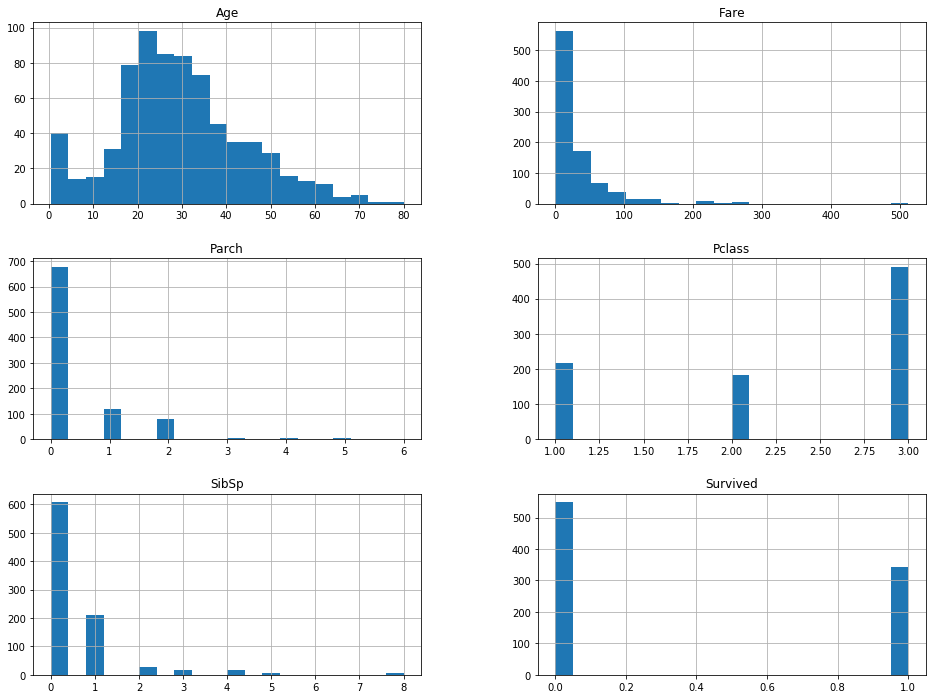

In [11]:
_ = train.hist(bins = 20, figsize = (16,12))

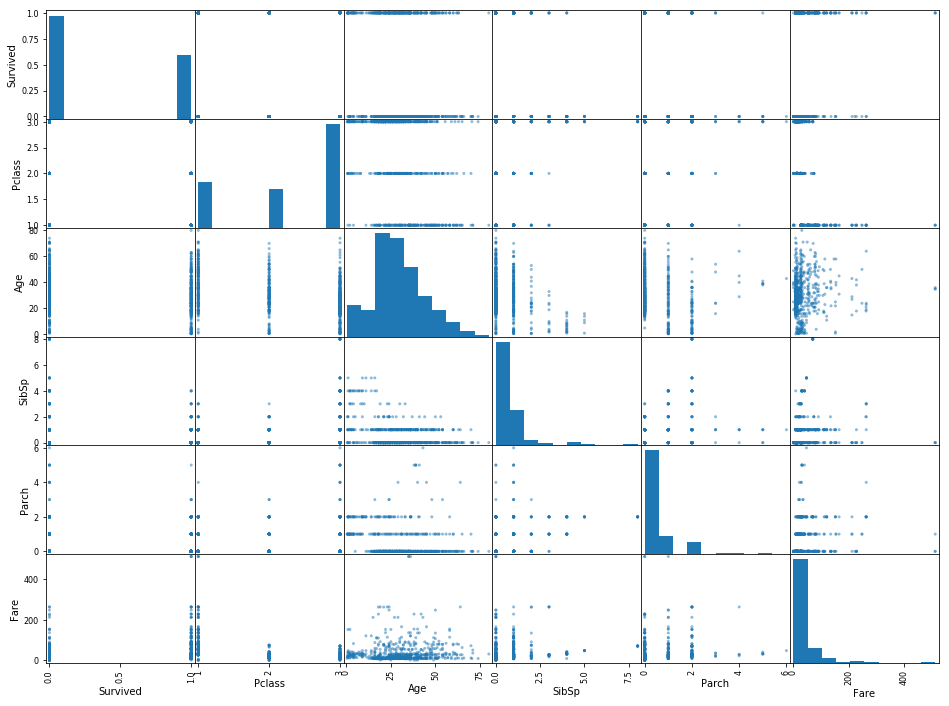

In [12]:
_ = pd.plotting.scatter_matrix(train, figsize = (16,12))

# 切分验证集

### 1. 随机采样

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_ = train.drop('Survived', axis =1)
Y_ = train['Survived']

In [15]:
X_train, X_vali, Y_train, Y_vali = \
train_test_split(X_, Y_, test_size = 0.2, random_state = 31)

In [16]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
398,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
825,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
39,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
786,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S
738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### 2. 哈希采样

In [17]:
import hashlib

In [18]:
hash_function = hashlib.md5
tmp = hash_function(np.int64(17686))
tmp.digest()

b'B\x87\x11\x91\xeb\\\xdd\xc0\x04\x06\xb5\\\xb8\xb3\xa2\xa0'

In [19]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
def split_train_test_by_index(*datas, test_ratio = 0.2, hash_function=hashlib.md5):
    res = []
    whether_in_test = lambda id_: hash_function(np.int64(id_)).digest()[-1] < 256 * test_ratio #ask sof what star mean
    for data in datas:
        ids = data.index.values
        in_test_set = pd.Series([whether_in_test(id_) for id_ in ids], index = data.index)
        train, vali = data.loc[~in_test_set], data.loc[in_test_set]
        res += [train, vali]
    return res

X_train, X_vali, Y_train, Y_vali = split_train_test_by_index(X_,Y_)

In [21]:
Y_vali.shape[0]*1.0/Y_.shape[0]

0.1829405162738496

In [22]:
print('rate of male/femate %f' % (X_.Sex.value_counts()['male']/X_.Sex.value_counts()['female']))
print('rate of male/femate %f' % (X_train.Sex.value_counts()['male']/X_train.Sex.value_counts()['female']))

rate of male/femate 1.837580
rate of male/femate 1.789272


### 3. 分层采样

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, vali_index = list(split.split(X_, X_.Sex))[0]
X_train = X_.reindex(train_index+1)
X_vali = X_.reindex(vali_index+1)
Y_train = Y_.reindex(train_index+1)
Y_vali = Y_.reindex(vali_index+1)

In [25]:
Y_vali

PassengerId
227    1
701    1
398    0
198    0
829    1
564    0
828    1
83     1
888    1
642    1
35     0
282    0
1      0
801    0
505    1
614    0
459    1
706    0
507    1
577    1
140    0
743    1
385    0
286    0
81     0
326    1
408    1
703    0
863    1
646    1
      ..
758    0
590    0
3      1
441    1
632    0
151    0
690    1
245    0
256    1
42     0
221    1
508    1
190    0
148    0
220    0
885    0
540    1
8      0
412    0
880    1
143    1
394    1
435    0
142    1
164    0
146    0
66     1
741    1
727    1
236    0
Name: Survived, Length: 179, dtype: int64

In [26]:
print('rate of male/femate %f' % (X_.Sex.value_counts()['male']/X_.Sex.value_counts()['female']))
print('rate of male/femate %f' % (X_train.Sex.value_counts()['male']/X_train.Sex.value_counts()['female']))

rate of male/femate 1.837580
rate of male/femate 1.836653


# 预处理



### 1. 处理空值

In [27]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline,FeatureUnion,Parallel

In [28]:
X_.isna().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [30]:
class A():
    def __init__(self, text = None):
        self.text = text
    def print_(self):
        print(self.text)
        
class B(A):
    def set_text(self, text):
        self.text = text
a_= A('hello world')

In [31]:
a_.print_()

hello world


In [32]:
b = B()
b.set_text('hey')
b.print_()

hey


In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
class Deal_NAs(BaseEstimator, TransformerMixin):
    def __init__(self, drop_Cabin = True, strategy = 'most_frequent'):
        self.drop_Cabin = drop_Cabin
        self.fillna_with = 'NA'
        self.strategy = strategy
        self.imputer = Imputer(strategy = self.strategy)
    def fit(self, X_):
        numeric_cols = X_.columns[(X_.dtypes != 'object').values]
        numeric_ = X_[numeric_cols]
        self.imputer.fit(numeric_)
        return self
    def transform(self, X_):
        numeric_cols = X_.columns[(X_.dtypes != 'object').values]
        numeric_ = X_[numeric_cols]
        trans_numeric = self.imputer.transform(numeric_)
        X_[numeric_cols] = trans_numeric
        if self.drop_Cabin:
            X_ = X_.drop('Cabin',axis = 1)
        X_ = X_.fillna(self.fillna_with)
        return X_

In [34]:
dn = Deal_NAs()
X_withoutNA = dn.fit_transform(X_train)

In [35]:
X_withoutNA.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [36]:
X_withoutNA.Embarked.value_counts()

S     515
C     132
Q      63
NA      2
Name: Embarked, dtype: int64

### 2. 处理类别变量 

In [37]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

In [38]:
class RobustLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.classes_ = []
        self.set_classes_ = None
        self.unseen_tag = 'unseen'
    def fit(self, list_):
        self.set_classes_ = set(list_)
        self.classes_ = list(self.set_classes_) + [self.unseen_tag]
        return self
    def transform(self, list_):
        list_ = [obj if obj in self.set_classes_ else self.unseen_tag for obj in list_]
        dct = dict(zip(self.classes_, range(len(self.classes_))))
        res = [dct[obj] for obj in list_]
        return res

In [39]:
a = ['a','b','c','a']
rle = RobustLabelEncoder()
rle.fit_transform(a)
b = ['a','b','a','x','y','c']
rle.transform(b)

[0, 2, 1, 0]

[0, 2, 0, 3, 3, 1]

In [40]:
lb  = LabelBinarizer()

In [41]:
lb.fit([1,0,1,2])
lb.transform([0,1,0,1])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [42]:
lb.classes_

array([0, 1, 2])

In [45]:
nlb = LabelBinarizer()
nlb.classes_ = np.array([0,1,2])
nlb.transform([0,1,1,2])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [46]:
class Encode_CatCols(BaseEstimator, TransformerMixin):
    def __init__(self, onehot = True, drop = []):
        self.onehot = onehot
        self.drop = drop
        self.encoders = {}
        self.catCols_ = None
        if self.onehot:
            self.oh_encoders = {}
    def fit(self, X_):
        catCols = [colname for colname in X_.columns if X_[colname].dtype == 'object']
        
        for col in self.drop:
            catCols.remove(col)
            
        self.catCols = catCols
        
        for col in catCols:
            encoder = RobustLabelEncoder()
            tmp = encoder.fit_transform(X_[col].tolist())
            self.encoders[col] = encoder
            if self.onehot:
                oh_encoder = LabelBinarizer() #不训练
                oh_encoder.classes_ = np.array(range(len(encoder.classes_)))
                #print(encoder.classes_)
                self.oh_encoders[col] = oh_encoder
        return self
    
    def transform(self, X_):
        
        for col in self.drop:
            X_ = X_.drop(col, axis = 1)
            
        if self.onehot:
            new_cols = [X_]
            
        for col in self.catCols:
            encoder = self.encoders[col]
            X_[col] = encoder.transform(X_[col].tolist())
            if self.onehot:
                binary_colnames = [col+'_'+class_ for class_ in encoder.classes_]
                #if len(binary_colnames) == 2: binary_colnames = [binary_colnames[0]]
                values = self.oh_encoders[col].transform(X_[col].tolist())
                new_cols.append(pd.DataFrame(values, index = X_.index, columns = binary_colnames))
                
        if self.onehot:
            
            new_cols = pd.concat(new_cols, axis = 1)
            X_ = new_cols.drop(self.catCols, axis = 1)
        return X_

In [47]:
ec = Encode_CatCols(onehot = True, drop = ['Name','Ticket'])
ec.fit_transform(X_withoutNA).head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,Sex_unseen,Embarked_NA,Embarked_C,Embarked_Q,Embarked_S,Embarked_unseen
PassengerId,,,,,,,,,,,,,
789,3.0,1.0,1.0,2.0,20.5750,1,0,0,0,0,0,1,0
348,3.0,24.0,1.0,0.0,16.1000,0,1,0,0,0,0,1,0
630,3.0,24.0,0.0,0.0,7.7333,1,0,0,0,0,1,0,0
735,2.0,23.0,0.0,0.0,13.0000,1,0,0,0,0,0,1,0
107,3.0,21.0,0.0,0.0,7.6500,0,1,0,0,0,0,1,0


In [48]:
from sklearn.pipeline import Pipeline

In [49]:
pipeline = Pipeline([('deal_na', Deal_NAs()),('encode_cat', Encode_CatCols(onehot = False, drop = ['Name','Ticket']))])

In [50]:
X_prepared = pipeline.fit_transform(X_)
X_prepared.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3.0,0,22.0,1.0,0.0,7.2500,3
2,1.0,1,38.0,1.0,0.0,71.2833,1
3,3.0,1,26.0,0.0,0.0,7.9250,3
4,1.0,1,35.0,1.0,0.0,53.1000,3
5,3.0,0,35.0,0.0,0.0,8.0500,3
6,3.0,0,24.0,0.0,0.0,8.4583,2
7,1.0,0,54.0,0.0,0.0,51.8625,3
8,3.0,0,2.0,3.0,1.0,21.0750,3
9,3.0,1,27.0,0.0,2.0,11.1333,3


In [51]:
#X_prepared = pipeline.fit_transform(X_)
X_train_p = pipeline.fit_transform(X_train)
X_vali_p = pipeline.transform(X_vali)

### 3. 处理数值变量

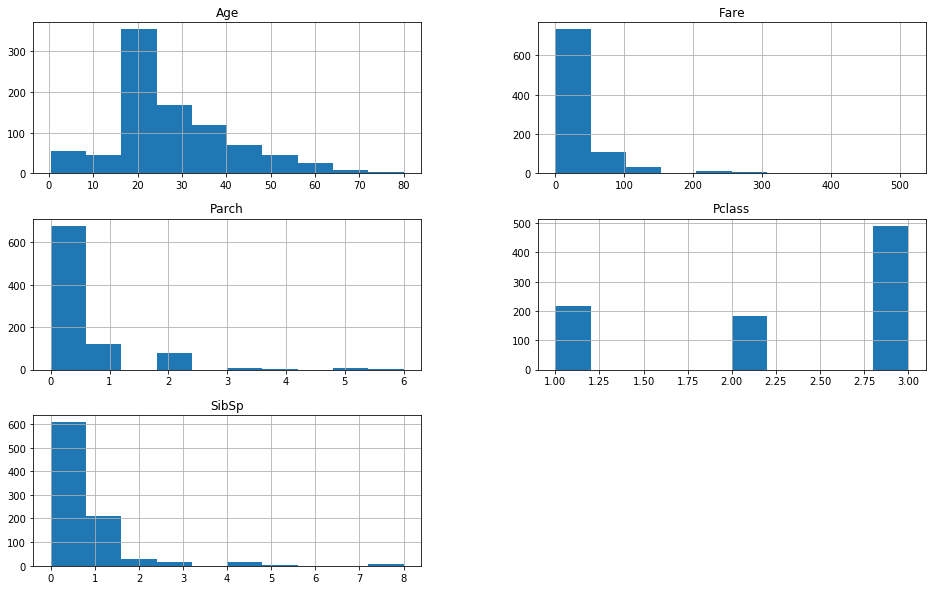

In [52]:
_ = X_.hist(figsize = (16,10))

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
class Scale_NumCols(BaseEstimator, TransformerMixin):
    def __init__(self, colnames = None, take_log = False):
        self.cols_to_transform = colnames
        self.take_log = take_log
        self.scaler = StandardScaler()
    def fit(self, X_):
        X_ = X_.copy()
        if self.cols_to_transform is None:
            self.cols_to_transform = [col for col in X_.columns if X_[col].dtype != 'object']
        if type(self.take_log) == bool:
            self.take_log = [self.take_log for col in self.cols_to_transform]
        else:
            assert len(self.take_log)==len(self.cols_to_transform)
        for col, log in zip(self.cols_to_transform, self.take_log):
            if log:
                X_.loc[:,col] = np.log(X_[col]+1)
        self.scaler.fit(X_[self.cols_to_transform])
        return self
    def transform(self, X_):
        for col, log in zip(self.cols_to_transform, self.take_log):
            if log:
                X_.loc[:,col] = np.log(X_[col]+1)
        X_.loc[:,self.cols_to_transform] = self.scaler.transform(X_[self.cols_to_transform])
        return X_

In [55]:
X_.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
5,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [56]:
scale_num = ('scale_num', Scale_NumCols(['Age', 'SibSp', 'Parch', 'Fare'], take_log = True))
pipeline = Pipeline([('deal_na', Deal_NAs()),('encode_cat', Encode_CatCols(drop = ['Name','Ticket'])),scale_num])

In [57]:
#X_prepared = pipeline.fit_transform(X_)
X_train_p = pipeline.fit_transform(X_train)
X_vali_p = pipeline.transform(X_vali)

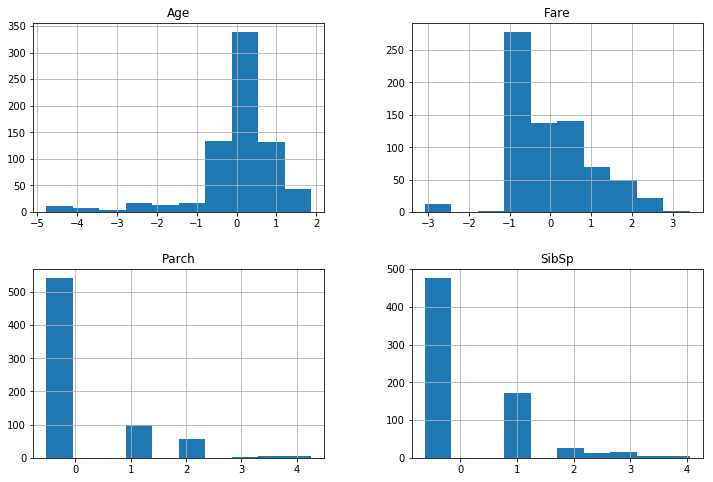

In [58]:
_ = X_train_p[['Age', 'SibSp', 'Parch', 'Fare']].hist(figsize = (12,8))

# 选择并训练模型

In [59]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import AdaBoostClassifier as abc
from sklearn.ensemble import GradientBoostingClassifier as gbc

In [64]:
model = lr(C = 1)
# model = dtc(min_samples_split = 10, max_features = 5)
# model = abc(dtc(max_depth = 4), n_estimators=100)
# model = gbc(n_estimators= 200)
#model = rfc(n_estimators=200 ,min_samples_split = 5)
model.fit(X_train_p, Y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
model.score(X_train_p, Y_train)

0.8075842696629213

In [66]:
model.score(X_vali_p, Y_vali)

0.7877094972067039

In [67]:
coef_df = pd.DataFrame({'name':X_train_p.columns.tolist(), 'coef':model.coef_[0]})
coef_df.sort_values('coef', ascending = False)

,coef,name
6,1.792728,Sex_female
4,0.547411,Fare
9,0.368447,Embarked_C
10,0.198749,Embarked_Q
8,0.134547,Embarked_NA
11,0.126607,Embarked_S
7,0.000000,Sex_unseen
12,0.000000,Embarked_unseen
3,-0.273082,Parch
2,-0.474609,SibSp


# 模型评估

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [73]:
cfm = confusion_matrix(Y_vali, Y_pred, labels = [0,1])
dff = pd.DataFrame(cfm, columns = ['predict_die','predict_survive'], index = ['true_die','true_survive'])
dff

,predict_die,predict_survive
true_die,92,22
true_survive,16,49


In [74]:
Y_pred = model.predict(X_vali_p)
print(classification_report(Y_vali, Y_pred))

             precision    recall  f1-score   support

          0       0.85      0.81      0.83       114
          1       0.69      0.75      0.72        65

avg / total       0.79      0.79      0.79       179



In [75]:
True_Negative = dff.iloc[0,0]
True_Positive = dff.iloc[1,1]
False_Negative = dff.iloc[1,0]
False_Positive = dff.iloc[0,1]

RECALL = True_Positive/(True_Positive + False_Negative)
RECALL

0.7538461538461538

In [76]:
PRECISION = True_Positive/(True_Positive + False_Positive)
PRECISION

0.6901408450704225

In [77]:
F1 = 2/(1./RECALL+1./PRECISION)
F1

0.7205882352941176

In [78]:
from sklearn.metrics import roc_curve

In [79]:
import matplotlib.pyplot as plt

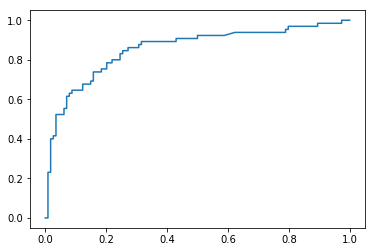

In [80]:
Y_pred_proba = model.predict_proba(X_vali_p)[:,1]
fpr,tpr,thres=roc_curve(Y_vali, Y_pred_proba)
plt.plot(fpr,tpr)

In [81]:
from sklearn.metrics import roc_auc_score

In [82]:
roc_auc_score(Y_vali, Y_pred_proba)

0.8542510121457491

# 参数微调
### 1. 网格搜索

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [84]:
model = gbc()
param_grid = [{'n_estimators':[50,100,200,400],'max_depth':[2,3,4,7],'min_samples_split':[7,9,11]}]
grid_search = GridSearchCV(model, param_grid, cv =5, n_jobs = 4)
grid_search.fit(X_train_p, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'n_estimators': [50, 100, 200, 400], 'max_depth': [2, 3, 4, 7], 'min_samples_split': [7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
grid_search.best_params_

{'max_depth': 2, 'min_samples_split': 11, 'n_estimators': 400}

In [86]:
best = grid_search.best_estimator_
best.score(X_vali_p, Y_vali)

0.8324022346368715

### 2. 随机搜索

In [87]:
model = rfc()
param_grid = {'n_estimators':[50,100,200,400],'max_depth':[2,3,4,7],'min_samples_split':[3,5,7]}
rand_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter = 40, cv =5, n_jobs = 4)
_ = rand_search.fit(X_train_p, Y_train)

In [88]:
rand_search.best_params_
rand_search.best_score_
rand_search.best_index_

{'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 200}

0.8230337078651685

2

# 特征工程

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
dataset = X_
dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

PassengerId
1          Mr
2         Mrs
3        Miss
4         Mrs
5          Mr
6          Mr
7          Mr
8      Master
9         Mrs
10        Mrs
11       Miss
12       Miss
13         Mr
14         Mr
15       Miss
16        Mrs
17     Master
18         Mr
19        Mrs
20        Mrs
21         Mr
22         Mr
23       Miss
24         Mr
25       Miss
26        Mrs
27         Mr
28         Mr
29       Miss
30         Mr
        ...  
862        Mr
863       Mrs
864      Miss
865        Mr
866       Mrs
867      Miss
868        Mr
869        Mr
870    Master
871        Mr
872       Mrs
873        Mr
874        Mr
875       Mrs
876      Miss
877        Mr
878        Mr
879        Mr
880       Mrs
881       Mrs
882        Mr
883      Miss
884        Mr
885        Mr
886       Mrs
887       Rev
888      Miss
889      Miss
890        Mr
891        Mr
Name: 0, Length: 891, dtype: object

# 输出结果

In [91]:
submit.head()

test_p = pipeline.transform(test)
Y_test_pred = best.predict(test_p)

test['Survived'] = Y_test_pred
result = test[['Survived']]
result.to_csv('result.csv', header = True, index = True)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
